# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


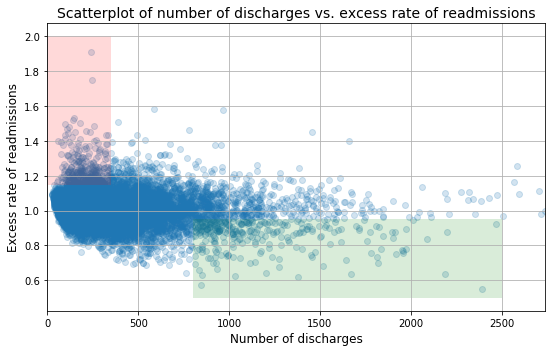

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].dropna()

In [8]:
df['type']=df['Number of Discharges'].apply(lambda x: 'small' if x < 100 else ( 'large' if x>1000 else np.nan))

In [9]:
df.dropna(inplace=True)

In [10]:
df.rename(columns={'Excess Readmission Ratio':'read_rat'},inplace=True)

In [11]:
s = df[df.type=='small']
l = df[df.type=='large']
s_mean = np.mean(s.read_rat)
l_mean = np.mean(l.read_rat)
s_std = np.std(s.read_rat)
l_std = np.std(l.read_rat)
s_n = len(s)
l_n=len(l)
print(s_mean)
print(l_mean)
print(s_n)
print(l_n)

1.0226183501683506
0.9783354211663071
1188
463


Sample sizes are large enough to perform a z-test.<br>
H(0): There is no significant difference in mean Excess Readmission Ratio between large and small hospitals.<br>
H(a): There is a significant difference in mean Excess Readmission Ratio between large and small hospitals.

In [12]:
z = (s_mean - l_mean) / np.sqrt(s_std ** 2 / s_n + l_std ** 2 / l_n)
z

7.6095459123357525

In [13]:
import scipy.stats as stats
p_val = stats.norm.cdf(-z) * 2
p_val

2.7506059007353298e-14

At a 99% confidence level, there is a significant difference in mean Excess Readmission Ratio between large and small hospitals. We reject the null hypothesis.

In [14]:
ci = (s_mean - l_mean)+np.array((-1,1))*2.576*np.sqrt(s_std ** 2 / s_n + l_std ** 2 / l_n)
print('We are 99% confident the true difference in mean ratio between the two types is between '+str(ci[0])+' and '+str(ci[1]))

We are 99% confident the true difference in mean ratio between the two types is between 0.02929217575297747 and 0.059273682251109426


I agree with there conclusion that larger hospitals tend to have higher Excess Readmission Ratios, but does that necessarily mean that Ratio is correlated with Number of Discharges?

In [15]:
#The original study dropped the first 81 and last 3 data points as outliers, which I've done as well.
c = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:-3]
c['type']= c['Number of Discharges'].apply(lambda x: 'small' if x < 100 else ( 'large' if x>1000 else np.nan))

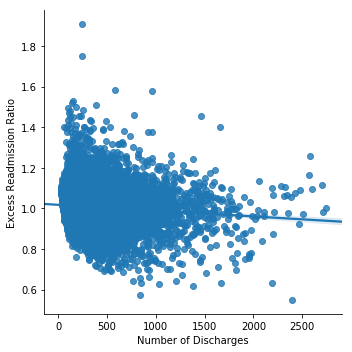

In [16]:
import seaborn as sns
_ = sns.lmplot(x='Number of Discharges',y='Excess Readmission Ratio', data=c)

In [23]:
c

,Number of Discharges,Excess Readmission Ratio,type,log_dis
1832,25,1.0914,small,3.218876
1699,27,1.0961,small,3.295837
1774,28,1.0934,small,3.332205
1853,29,1.0908,small,3.367296
1290,30,1.1123,small,3.401197
1602,31,1.0992,small,3.433987
2048,33,1.0847,small,3.496508
2441,34,1.0738,small,3.526361
2512,34,1.0720,small,3.526361
2825,34,1.0651,small,3.526361


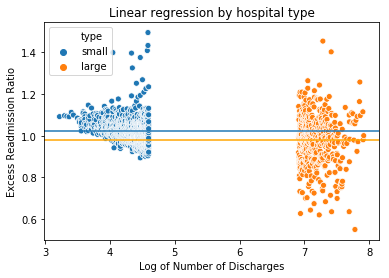

In [33]:
c['log_dis']=np.log(c['Number of Discharges'])
_ = sns.scatterplot(x=c['log_dis'],y='Excess Readmission Ratio', data=c, hue='type')
_=plt.axhline(y=c[c.type=='small']['Excess Readmission Ratio'].mean())
_=plt.axhline(y=c[c.type=='large']['Excess Readmission Ratio'].mean(),c='orange')
_=plt.xlabel('Log of Number of Discharges')
_=plt.ylim((0.5,None))
_=plt.title('Linear regression by hospital type')

In general, the scatterplot is best to show the relationship between two numerical values. One weakness in the original plot is keeping the original scale for Number of discharges. Considering a 'large' hospital has more than 10x the discharges of a 'small' hospital, keeping the linear scale makes it very difficult to compare on a plot, as the 'small' hospitals will be bunched on the left side of the plot, near the axis. I've plotted the log of number of discharges to better compare the intragroup variance in Readmission rate between the two types.

In [ ]:
c.corr(method='pearson')

In [ ]:
c[c.type=='small'].corr(method='pearson')

In [ ]:
c[c.type=='large'].corr(method='pearson')

Based on the Pearson correlation coefficient of -0.09, the correlation between number of discharges and excess readmission ratio is actually very weakly correlated. This could support the orignial conlcusion that smaller hospitals are not as well equipped to prevent readmission as large hospitals, however it does conflict with the original conclusion that there is significant correlation overall. That is, there is some qualitative difference causing smaller hospital to have a higher readmission rate, but this rate does not increase as the number of discharges increases within the hospital type group.

Statistical vs. Practical Significance

Given the weak correlation, but significant difference in means between the hospital types, it would suggest that more research into small hospitals specifically is necessary to determine the root cause of higher readmission ratio. That said, the readmission rate is likely higher in small hospitals by 3-6%, so there is a bigger question which is whether investing resources to improve that small difference in valuable. 
<br><br>
The original regulatory recommendations seem to apply in this case, i.e. recognizing that it is not clear that increasing the number of discharges will lead to higher readmission rate (if this were true, combining smaller hosipitals into a large hospital would not improve the readmission rate).